<a href="https://colab.research.google.com/github/pierandreamorelli/stage/blob/main/cs_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scaletta
# Pipeline 1 - Data Preparation
1.   Caricare DF: PY, PPY
2.   Concatenare AN con PY, PPY
3.   Eliminare colonne duplicate (Pandas)
4.   Identificare colonne che hanno un solo valore e dropparle
5. Identificare colonne categoriche
6. Fare encoding one-hot per colonne categoriche
7. Identificare colonne numeriche
8. Fare re-scaling e normalizzare colonne numeriche
9. Gestire valori NaN

# Pipeline 2 - Training
1.   Identificare la Y (colonna target, presa da df_LY) 
2.   Opzionale: passare anche la Y nella data preparation 
3. Attaccare Y a df_res 
4. split train e test (80%, 20%)
5. identificare due/quattro modelli 
6. identificare le metriche di valutazione
7. effettuare il training dei modelli
8. valutarne le performance 



# Pipeline 1 - Data Preparation

1. **Upload DataFrame**

In [1]:
import pandas as pd

df_AN = pd.read_csv('/content/drive/MyDrive/dataset/cs_search.csv')
df_LY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_lastyear.csv')
df_PY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_prevyear.csv')
df_PPY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_prevprevyear.csv')



In [ ]:
df_AN.set_index('id')
df_LY.set_index('companyId')
df_PY.set_index('companyId')
df_PPY.set_index('companyId')

2. **Concat DataFrame Financial - Anagraphic**

In [6]:
df_res_LY = df_AN.join(df_LY, lsuffix='_AN', rsuffix='_LY')

In [7]:
df_res_PY = df_AN.join(df_PY, lsuffix='_AN', rsuffix='_PY')

In [8]:
df_res_PPY = df_AN.join(df_PPY, lsuffix='_AN', rsuffix='_PPY')

3. **Duplicates Drop**

In [9]:
df_res_LY = df_res_LY.loc[:,~df_res_LY.columns.duplicated()].copy()

In [10]:
df_res_PY = df_res_PY.loc[:,~df_res_PY.columns.duplicated()].copy()

In [11]:
df_res_PPY = df_res_PPY.loc[:,~df_res_PPY.columns.duplicated()].copy()

4. **Unique values drop**

In [12]:
nunique = df_res_LY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_LY = df_res_LY.drop(cols_to_drop, axis=1)

In [13]:
nunique = df_res_PY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_PY = df_res_PY.drop(cols_to_drop, axis=1)

In [14]:
nunique = df_res_PPY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_PPY = df_res_PPY.drop(cols_to_drop, axis=1)

5. **Categorical Columns Identification**

In [15]:
cols = df_res_LY.columns
num_cols = df_res_LY._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

6. **Numeric Columns Identification**

In [16]:
num_cols = df_res_LY._get_numeric_data()

7. **Encoding One Hot Categorical Columns**

In [17]:
#df with only categorical features
cat_df = pd.DataFrame()
for i in cat_cols:
  cat_df[i] = df_res_PY[i]

In [18]:
#one hot office type
onehot_OT_PY = pd.get_dummies(cat_df['officeType'])

In [19]:
#one hot province
onehot_PR_PY = pd.get_dummies(cat_df['address.province'])

8. **Scaling and Normalization num_cols**

In [20]:
#df_LY with only numerical features
num_df_LY = df_res_LY
for i in cat_cols:
  num_df_LY = num_df_LY.drop([i], axis = 1)

In [21]:
from sklearn import preprocessing

#Normalization of LY
x = num_df_LY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_LY = pd.DataFrame(x_scaled)

In [22]:
#df_PY with only numerical features
num_df_PY = df_res_PY
for i in cat_cols:
  num_df_PY = num_df_PY.drop([i], axis = 1)

In [23]:
#Normalization of PY

x = num_df_PY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_PY = pd.DataFrame(x_scaled)

In [24]:
#df_PPY with only numerical features

num_df_PPY = df_res_PPY
for i in cat_cols:
  num_df_PPY = num_df_PPY.drop([i], axis = 1)

In [25]:
#Normalization of PPY

x = num_df_PPY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_PPY = pd.DataFrame(x_scaled)

# Pipeline 2 - Training

1. **Target = 'profitAndLoss.revenue' (Fatturato)**

2. **PCA**

In [41]:
import numpy as np
from sklearn.decomposition import PCA

#Replace NaN with mean of column PY
for col in norm_df_PY:
  norm_df_PY[col].fillna(value=norm_df_PY[col].mean(), inplace=True)

In [42]:
import numpy as np
from sklearn.decomposition import PCA

#Replace NaN with mean of column PPY
for col in norm_df_PPY:
  norm_df_PPY[col].fillna(value=norm_df_PPY[col].mean(), inplace=True)

In [43]:
#Concat PY and PPY
years = [norm_df_PY, norm_df_PPY]
norm_df_fin = pd.concat(years, axis=1, join='inner')
norm_df_fin.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.000000,0.0,0.123744,0.001153,0.0,0.000019,0.000019,0.230992,0.000230,0.000027,...,0.037276,0.016274,0.031510,0.032343,0.012094,0.018433,0.063295,0.041453,0.097083,0.002691
1,0.002217,0.0,0.006638,0.001061,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005376,1.000000,0.000000,1.000000,0.000000,0.000007
2,0.004435,0.0,0.006638,0.001612,0.0,0.812360,0.823238,0.169566,0.043089,0.018758,...,0.037276,0.016274,0.031510,0.032343,0.003387,0.451223,0.063295,0.451223,0.097083,0.000006
3,0.006652,0.0,0.006638,0.001102,0.0,0.397336,0.400181,0.357097,0.101165,0.047178,...,0.189612,0.015664,0.404025,0.000000,0.250840,0.223229,0.873404,0.724152,0.097083,0.000013
4,0.008869,0.0,0.006586,0.001561,0.0,0.100532,0.098797,0.417713,0.059295,0.025842,...,0.037276,0.005601,0.063714,0.032343,0.000145,0.018433,1.000000,0.573530,0.097083,0.000048


3. **PCA: 50, 80, 95% of Variance**

In [65]:
#PCA 50% + Y 
pca1 = PCA(n_components=0.50)
pca1.fit(norm_df_PY)
columns = ['PC_%i' % i for i in range(5)]
df_pca_PY_50  = pd.DataFrame(pca1.transform(norm_df_PY), columns=columns, index=norm_df_PY.index)

In [66]:
#PCA 80% + Y
pca2 = PCA(n_components=0.80)
pca2.fit(norm_df_PY)
columns = ['PC_%i' % i for i in range(14)]
df_pca_PY_80  = pd.DataFrame(pca2.transform(norm_df_PY), columns=columns, index=norm_df_PY.index)

In [67]:
#PCA 95%
pca3 = PCA(n_components=0.95)
pca3.fit(norm_df_PY)
columns = ['PC_%i' % i for i in range(29)]
df_pca_PY  = pd.DataFrame(pca3.transform(norm_df_PY), columns=columns, index=norm_df_PY.index)

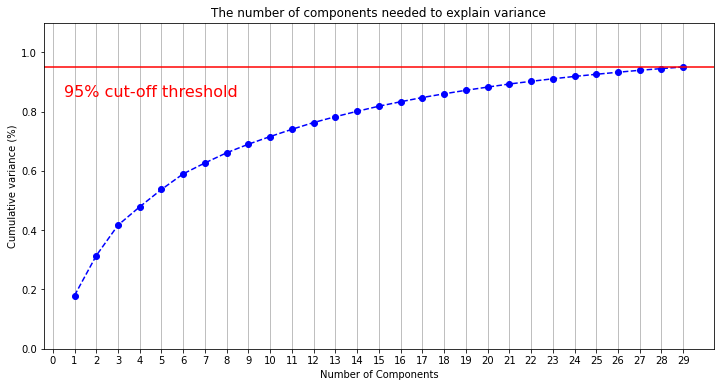

In [68]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 30, step=1)
y = np.cumsum(pca3.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')

#change from 0-based array index to 1-based human-readable label
plt.xticks(np.arange(0, 30, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

4. **Add Y target column**

In [ ]:
df_pca_PY_50['Y'] = norm_df_LY[4]
df_pca_PY_80['Y'] = norm_df_LY[4]
df_pca_PY['Y'] = norm_df_LY[4]

5. **PCA on PY + PPY**

In [ ]:
#PCA 95% + Y with PY + PPY
pca4 = PCA(n_components=0.95)
pca4.fit(norm_df_fin)
columns = ['PC_%i' % i for i in range(49)]
df_pca_fin  = pd.DataFrame(pca3.transform(norm_df_fin), columns=columns, index=norm_df_fin.index)
df_pca_fin['Y'] = norm_df_LY[4]

**5. Train Test Split on PY**

In [74]:
from sklearn.model_selection import train_test_split

X = df_pca_PY.iloc[:, 0:29]
y = df_pca_PY.iloc[:, 29]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#LR - Benchmark

In [75]:
import numpy as np
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(n_jobs = 2)
lreg.fit(X_train, y_train)
sc_lr = lreg.score(X_test, y_test)
print('Accuracy: ' + str(sc_lr))

Accuracy: 0.8022686399016026


***Linear Regression - K-Fold Validation***

In [58]:
from numpy.ma.core import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = df_pca_PY.iloc[:, 0:29]
y = df_pca_PY.iloc[:, 29]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(lreg, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=2)
np.mean(absolute(scores))

0.0014511668505116932

***Linear Regression - Log-Scale Plot***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


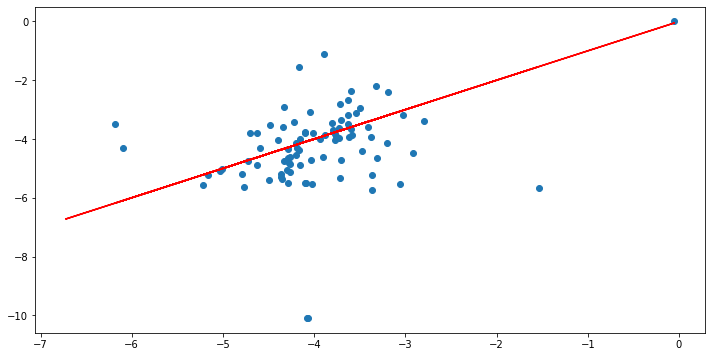

In [76]:
y_pred_lr = lreg.predict(X_test) #predictions on test data
x = np.log(y_pred_lr)
y = np.log(y_test)

plt.scatter(x, y)
plt.plot(x, x, color='red')
plt.show()

#SVM - Regressor

In [ ]:
from sklearn.svm import SVR

svr = SVR(gamma='auto', C=1, epsilon=0.01)
svr.fit(X_train, y_train)
sc_svr = svr.score(X_test, y_test)
print('Accuracy: ' + str(sc_svr))

Accuracy: -0.19555387226524013


***SVR - K-Fold Validation***

In [ ]:
X = df_pca_PY.iloc[:, 0:29]
y = df_pca_PY.iloc[:, 29]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(svr, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=2)
np.mean(absolute(scores))

0.0021108125435485912

***SVR - Log-Scale Plot***

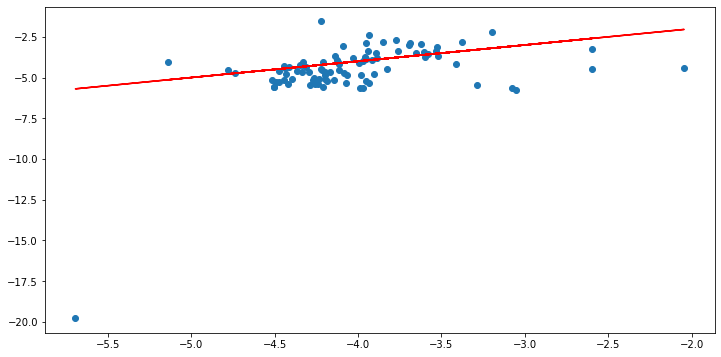

In [ ]:
y_pred_svr = svr.predict(X_test)
x = np.log(y_pred_svr)
y = np.log(y_test)

plt.scatter(x, y)
plt.plot(x, x, color='red')
plt.show()

# RF - Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs = 2, random_state=0)
rfr.fit(X_train, y_train)
sc_rfr = rfr.score(X_test, y_test)
print('Accuracy: ' + str(sc_rfr))

Accuracy: -0.2503058078526128


***RF - K-Fold Validation***

In [ ]:
X = df_pca_PY.iloc[:, 0:29]
y = df_pca_PY.iloc[:, 29]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rfr, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=2)
np.mean(absolute(scores))

0.0025137292789003214

***RANDOM FOREST - Log-Scale Plot***

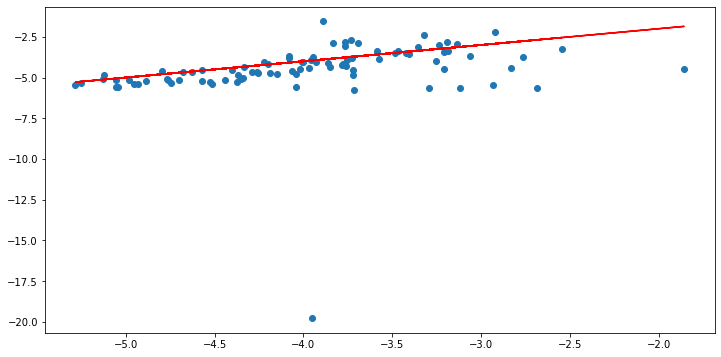

In [ ]:
y_pred_rfr = rfr.predict(X_test)
x = np.log(y_pred_rfr)
y = np.log(y_test)

plt.scatter(x, y)
plt.plot(x, x, color='red')
plt.show()

# MLP - Regressor

In [ ]:
!pip install scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

In [80]:
X = df_pca_PY.iloc[:, 0:29]
y = df_pca_PY.iloc[:, 29]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.02, random_state=1)

In [81]:
#Create MLP
mlpr = Sequential(name="pier_mlp")
mlpr.add(Dense(8, activation="relu", name="layer1"))
mlpr.add(Dense(11, activation="relu", name="layer2"))
mlpr.add(Dense(8, activation="relu", name="layer3"))
mlpr.add(Dense(1, name="layer4"))


#Compile MLP  
mlpr.compile(loss='mean_squared_error', optimizer='adam')
history = mlpr.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), shuffle=True)


Epoch 1/20
12/12 [==============================] - 1s 20ms/step - loss: 0.0118 - val_loss: 0.0022
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0019
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0016
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0014
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0013
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0013
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0012
Epoch 8/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 9/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0011
Epoch 10/20
12/12 [==============================] - 0s 7ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 11/20
12/12 

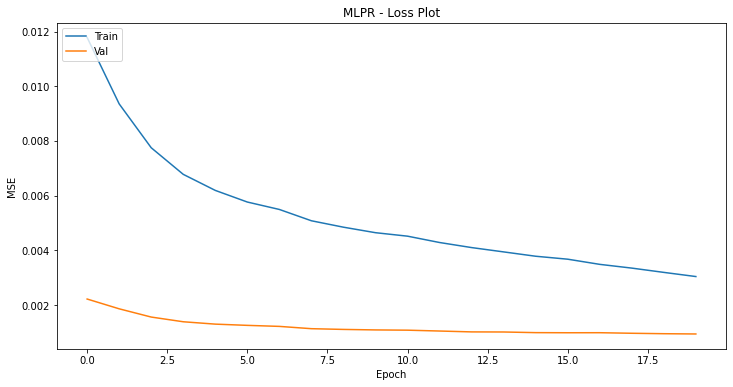

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLPR - Loss Plot')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [84]:
y_pred = mlpr.predict(X_val)
y_res = np.array(y_val)
y_predict = [elem for i in y_pred for elem in i]
res = pd.DataFrame()
res['predict'] = y_predict
res['value'] = y_res
dist = [np.linalg.norm(abs(y_predict[i])-abs(y_res[i])) for i in range(len(y_predict))]
res['distance'] = dist
res['distance %'] = ((abs(res['predict']) - abs(res['value'])) / abs((res['predict']) + abs(res['value'])))*100
res

,predict,value,distance,distance %
0,0.043001,0.025050,0.017951,26.379257
1,0.022802,0.015254,0.007548,19.834404
2,0.011964,0.004870,0.007095,42.146142
3,0.016935,0.013041,0.003894,12.990394
4,0.019604,0.021866,0.002262,-5.454918
5,0.019837,0.003954,0.015883,66.760527
6,0.013826,0.010242,0.003584,14.892126
7,0.022802,0.025771,0.002969,-6.111600


In [ ]:
# K-fold Validation
X = df_pca_PY.iloc[:, 0:29]
y = df_pca_PY.iloc[:, 29]
estimator = KerasRegressor(model=mlpr, epochs=10, batch_size=32)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold, scoring='neg_mean_squared_error')